## Machine Learning Using Tensorflow (RNN) to implement language translator for English-French translation.

## Translating English sentences to French, using LSTM on RNN architecture. Accuracy of model : 95% 

### We will go through 6 tasks to implement our project:

TASK 1: IMPORT LIBRARIES AND DATASETS

TASK 2: PERFORM DATA CLEANING

TASK 3: VISUALIZE CLEANED UP DATASET

TASK 4: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

TASK 5: build the RNN model

TASK 6: ASSESS TRAINED MODEL PERFORMANCE



### TASK 1: IMPORT LIBRARIES AND DATASETS

In [1]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
# install plotly
!pip install plotly
#install wordcloud
!pip install wordcloud
#install jupyterthemes
!pip install jupyterthemes


In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


C:\Users\Hashooma\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

<ipython-input-3-fb6af57a13c8>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
<ipython-input-3-fb6af57a13c8>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


In [4]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [5]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


- Concatenate both dataframes and indicate how many records are present
- Print out the following: "Total English Records = xx, Total French Records = xx"

In [6]:
df=pd.concat([df_english,df_french],axis=1)
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2       california est gÃ©nÃ©ralement calme en mars , ...  
3       les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4       votre moins aimÃ© fruit est le raisin , mais m...  
...                                                   ...  
137855  la france est jamais occupÃ©e en mars , et il ...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillÃ© pendant l' Ã©tÃ© ,...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit prÃ©fÃ©rÃ© , mais la ba...  

[137860 rows x 2 columns]

In [7]:
print('Total English Records = {}'.format(len(df['english'])))
print('Total French Records = {}'.format(len(df['french'])))

Total English Records = 137860
Total French Records = 137860


### TASK 2: PERFORM DATA CLEANING

In [8]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hashooma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hashooma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# function to remove punctuations
def remove_punc(x):
    return re.sub('[!#?,.:";]', '', x)

In [10]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

How many unique words are available in the english and french dictionairies?

In [11]:
english_words = []
french_words  = []
def get_unique_words(x,word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)
            
df['english'].apply(lambda x: get_unique_words(x,english_words))
        
df['french'].apply(lambda x: get_unique_words(x,french_words))


0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [12]:
total_english_words=len(english_words)
total_english_words

199

In [13]:
# number of unique words in french
total_french_words=len(french_words)
total_french_words

350

### TASK 3: VISUALIZE CLEANED UP DATASET

In [19]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [20]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [21]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)


In [22]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [23]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [24]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [25]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [26]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

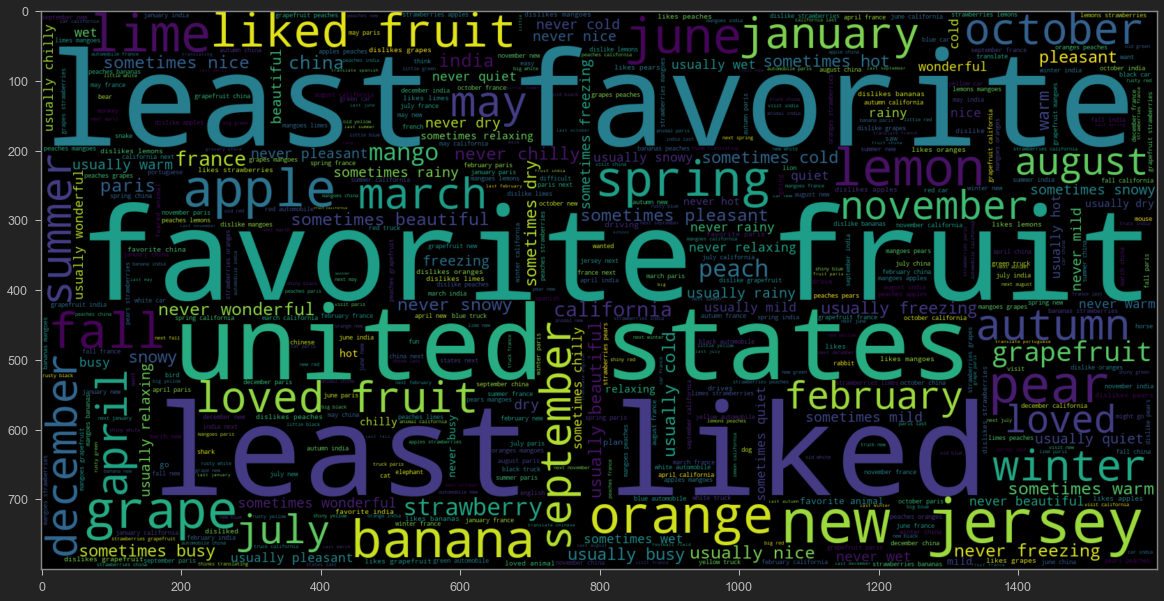

In [27]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [28]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [29]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


- Perform similar data visualizations but for the french language instead
- What are the top 3 common french words?!
- What is the maximum number of words in any french document?


In [30]:
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'Ã©tats-unis',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gÃ¨le',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'gÃ©nÃ©ralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'chaud',
 'en',
 'juin',
 'les',
 'Ã©tats-unis',
 'est',
 'parfois',
 'lÃ©gÃ¨re',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimÃ©',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimÃ©',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'prÃ©fÃ©rÃ©',
 'est',
 "l'orange",
 'mais',
 'mon',
 'prÃ©fÃ©rÃ©',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'dÃ©cembre',
 'mais',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupÃ©',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaud

In [31]:
french_words_counts = Counter(words)
french_words_counts


# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words_counts


[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('gÃ©nÃ©ralement', 31292),
 ('moins', 27557),
 ('aimÃ©', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('prÃ©fÃ©rÃ©', 23305),
 ('agrÃ©able', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('Ã', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('Ã©tats-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('Ã©tÃ©', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('dÃ©cembre', 8945),
 ('fÃ©vrier', 8942),
 ('octob

In [32]:
# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
    french_words.append(french_words_counts[i][0])
    french_counts.append(french_words_counts[i][1])



In [33]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()



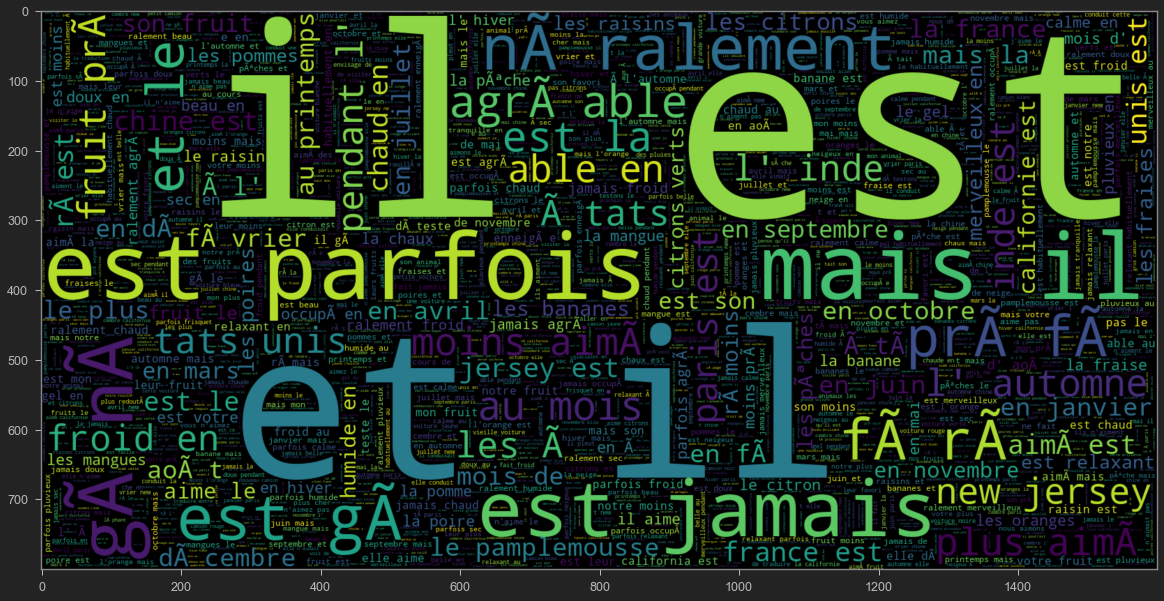

In [34]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [35]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  24


### TASK 4: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING¶

In [36]:
def tokenize_and_pad(x, maxlen):
    
  #  a tokenier to tokenize the words and create sequences of tokenized words
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
    return tokenizer, sequences, padded

In [37]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [38]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [39]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [40]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [41]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit prÃ©fÃ©rÃ©  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [42]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [43]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril          "

In [44]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

- Change the padding length so that both english and french have the same length

In [45]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

### TASK 5: build the RNN model


In [46]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 512, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(512))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,512) to (1,23,512)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(512, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 512)           102400    
_________________________________________________________________
lstm (LSTM)                  (None, 512)               2099200   
_________________________________________________________________
repeat_vector (RepeatVector) (None, 24, 512)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 512)           2099200   
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 351)           180063    
Total params: 4,480,863
Trainable params: 4,480,863
Non-trainable params: 0
_________________________________________________________________


In [47]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 24, 1)

In [48]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 912s 8s/step - loss: 3.0762 - accuracy: 0.4853 - val_loss: 1.6605 - val_accuracy: 0.6087
Epoch 2/10
110/110 [==============================] - 818s 7s/step - loss: 1.5635 - accuracy: 0.6135 - val_loss: 1.3282 - val_accuracy: 0.6507
Epoch 3/10
110/110 [==============================] - 817s 7s/step - loss: 1.2470 - accuracy: 0.6644 - val_loss: 1.0423 - val_accuracy: 0.7106
Epoch 4/10
110/110 [==============================] - 815s 7s/step - loss: 0.9618 - accuracy: 0.7266 - val_loss: 0.8099 - val_accuracy: 0.7663
Epoch 5/10
110/110 [==============================] - 817s 7s/step - loss: 0.7583 - accuracy: 0.7789 - val_loss: 0.6421 - val_accuracy: 0.8127
Epoch 6/10
110/110 [==============================] - 819s 7s/step - loss: 0.6039 - accuracy: 0.8238 - val_loss: 0.5674 - val_accuracy: 0.8312
Epoch 7/10
110/110 [==============================] - 816s 7s/step - loss: 0.4793 - accuracy: 0.8583 - val_loss: 0.4231 - val_accuracy: 0.8732

In [49]:
# save the model
model.save("weights.h5")

- Train the model with different embedding output dimension and comment on model performance during training

## TASK 6: ASSESS TRAINED MODEL PERFORMANCE

In [50]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [51]:
for i in range(5):
    print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
    print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - her favorite animals were dogs          

Original French word - ses animaux ã©taient des chiens prã©fã©rã©s                  

Predicted French word - ses animaux ã©taient des des prã©fã©rã©s                  




Original English word - california is warm during august but it is nice in july    

Original French word - californie est chaud au mois d' aoã»t mais il est agrã©able en juillet           

Predicted French word - californie est chaud au mois d' aoã»t mais il est agrã©able en juillet           




Original English word - she dislikes pears grapefruit and grapes         

Original French word - elle dã©teste les poires les pamplemousses et les raisins               

Predicted French word - elle dã©teste les poires les pamplemousses et les raisins               




Original English word - california is sometimes busy during august and it is usually cold in february  

Original French word - californie est parfois occupã© au mois d' aoã»t et il est g

 # Best wish
 